In [1]:
import numpy as np
import pandas as pd
# Pretty display for notebooks
%matplotlib inline

train_data = pd.read_csv('train.csv', nrows = 2000000, parse_dates=["pickup_datetime"])
test_data = pd.read_csv('test.csv', parse_dates=["pickup_datetime"])

display(train_data.head(n=10))
display(test_data.head(n=10))


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1
5,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45,-74.000964,40.731630,-73.972892,40.758233,1
6,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00,-73.980002,40.751662,-73.973802,40.764842,1
7,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00,-73.951300,40.774138,-73.990095,40.751048,1
8,2012-12-03 13:10:00.000000125,9.0,2012-12-03 13:10:00,-74.006462,40.726713,-73.993078,40.731628,1
9,2009-09-02 01:11:00.00000083,8.9,2009-09-02 01:11:00,-73.980658,40.733873,-73.991540,40.758138,2


,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1
5,2012-12-01 21:12:12.0000005,2012-12-01 21:12:12,-73.960983,40.765547,-73.979177,40.740053,1
6,2011-10-06 12:10:20.0000001,2011-10-06 12:10:20,-73.949013,40.773204,-73.959622,40.770893,1
7,2011-10-06 12:10:20.0000003,2011-10-06 12:10:20,-73.777282,40.646636,-73.985083,40.759368,1
8,2011-10-06 12:10:20.0000002,2011-10-06 12:10:20,-74.014099,40.709638,-73.995106,40.741365,1
9,2014-02-18 15:22:20.0000002,2014-02-18 15:22:20,-73.969582,40.765519,-73.980686,40.770725,1


In [2]:
print(train_data.shape)

(2000000, 8)


In [3]:
train_data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+06,2.000000e+06,2.000000e+06,1.999986e+06,1.999986e+06,2.000000e+06
mean,1.134779e+01,-7.252321e+01,3.992963e+01,-7.252395e+01,3.992808e+01,1.684113e+00
std,9.852883e+00,1.286804e+01,7.983352e+00,1.277497e+01,1.032382e+01,1.314982e+00
min,-6.200000e+01,-3.377681e+03,-3.458665e+03,-3.383297e+03,-3.461541e+03,0.000000e+00
25%,6.000000e+00,-7.399208e+01,4.073491e+01,-7.399141e+01,4.073400e+01,1.000000e+00
50%,8.500000e+00,-7.398181e+01,4.075263e+01,-7.398016e+01,4.075312e+01,1.000000e+00
75%,1.250000e+01,-7.396713e+01,4.076710e+01,-7.396369e+01,4.076809e+01,2.000000e+00
max,1.273310e+03,2.856442e+03,2.621628e+03,3.414307e+03,3.345917e+03,2.080000e+02


In [4]:
train_data = train_data[train_data.fare_amount>0]
print(train_data.shape)

(1999867, 8)


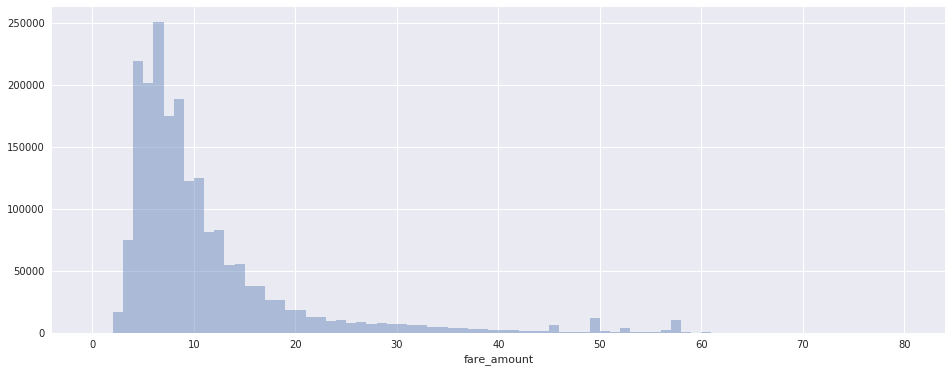

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(16,6)})

sns.distplot(train_data[train_data.fare_amount<80].fare_amount, norm_hist=False, kde=False, bins=80)


In [6]:
#clearly most of the fare amounts lie between 0 to 10 
#check for null
print(train_data.isnull().sum())

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    14
dropoff_latitude     14
passenger_count       0
dtype: int64


In [7]:
train_data = train_data.drop(train_data[train_data.isnull().any(1)].index, axis = 0)
print(train_data.shape)

test_data = test_data.drop(test_data[test_data.isnull().any(1)].index, axis = 0)
print(test_data.shape)


(1999853, 8)
(9914, 7)


In [8]:
#latitude range -90 to 90
train_data = train_data[train_data.pickup_latitude>=-90]
train_data = train_data[train_data.pickup_latitude<=90]
train_data = train_data[train_data.dropoff_latitude>=-90]
train_data = train_data[train_data.dropoff_latitude<=90]
print(train_data.shape)

test_data = test_data[test_data.pickup_latitude>=-90]
test_data = test_data[test_data.pickup_latitude<=90]
test_data = test_data[test_data.dropoff_latitude>=-90]
test_data = test_data[test_data.dropoff_latitude<=90]
print(test_data.shape)

(1999805, 8)
(9914, 7)


In [9]:
#longitude range -180 to 180

train_data = train_data[train_data.pickup_longitude>=-180]
train_data = train_data[train_data.pickup_longitude<=180]
train_data = train_data[train_data.dropoff_longitude>=-180]
train_data = train_data[train_data.dropoff_longitude<=180]
print(train_data.shape)

test_data = test_data[test_data.pickup_longitude>=-180]
test_data = test_data[test_data.pickup_longitude<=180]
test_data = test_data[test_data.dropoff_longitude>=-180]
test_data = test_data[test_data.dropoff_longitude<=180]
print(test_data.shape)

(1999768, 8)
(9914, 7)


In [10]:
from geopy import distance
from geopy import Point

def calculate_dist(pickup_lat, pickup_long, dropoff_lat, dropoff_long):
    p1 = Point(pickup_lat, pickup_long)
    p2 = Point(dropoff_lat, dropoff_long)
    return distance.distance(p1,p2).kilometers

In [11]:
train_data['Distance']=train_data[['pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude']].apply(lambda x: calculate_dist(x[0], x[1], x[2], x[3]), axis=1)
display(train_data.head(n=10))

test_data['Distance']=test_data[['pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude']].apply(lambda x: calculate_dist(x[0], x[1], x[2], x[3]), axis=1)
display(test_data.head(n=10))

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,1.029601
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,8.443441
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,1.389132
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2.795790
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,1.998338
5,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45,-74.000964,40.731630,-73.972892,40.758233,1,3.787980
6,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00,-73.980002,40.751662,-73.973802,40.764842,1,1.554446
7,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00,-73.951300,40.774138,-73.990095,40.751048,1,4.159930
8,2012-12-03 13:10:00.000000125,9.0,2012-12-03 13:10:00,-74.006462,40.726713,-73.993078,40.731628,1,1.255507
9,2009-09-02 01:11:00.00000083,8.9,2009-09-02 01:11:00,-73.980658,40.733873,-73.991540,40.758138,2,2.847028


,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2.320991
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2.423802
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,0.618182
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,1.959671
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,5.382833
5,2012-12-01 21:12:12.0000005,2012-12-01 21:12:12,-73.960983,40.765547,-73.979177,40.740053,1,3.221143
6,2011-10-06 12:10:20.0000001,2011-10-06 12:10:20,-73.949013,40.773204,-73.959622,40.770893,1,0.931700
7,2011-10-06 12:10:20.0000003,2011-10-06 12:10:20,-73.777282,40.646636,-73.985083,40.759368,1,21.566812
8,2011-10-06 12:10:20.0000002,2011-10-06 12:10:20,-74.014099,40.709638,-73.995106,40.741365,1,3.871424
9,2014-02-18 15:22:20.0000002,2014-02-18 15:22:20,-73.969582,40.765519,-73.980686,40.770725,1,1.101426


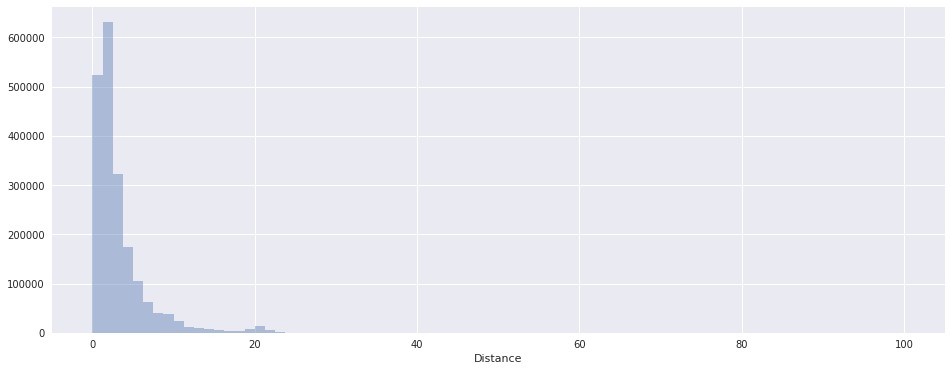

In [12]:
sns.distplot(train_data[train_data.Distance<100].Distance, norm_hist=False, kde=False, bins=80)

In [13]:
display(train_data.head(n=10))

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,1.029601
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,8.443441
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,1.389132
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2.795790
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,1.998338
5,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45,-74.000964,40.731630,-73.972892,40.758233,1,3.787980
6,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00,-73.980002,40.751662,-73.973802,40.764842,1,1.554446
7,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00,-73.951300,40.774138,-73.990095,40.751048,1,4.159930
8,2012-12-03 13:10:00.000000125,9.0,2012-12-03 13:10:00,-74.006462,40.726713,-73.993078,40.731628,1,1.255507
9,2009-09-02 01:11:00.00000083,8.9,2009-09-02 01:11:00,-73.980658,40.733873,-73.991540,40.758138,2,2.847028


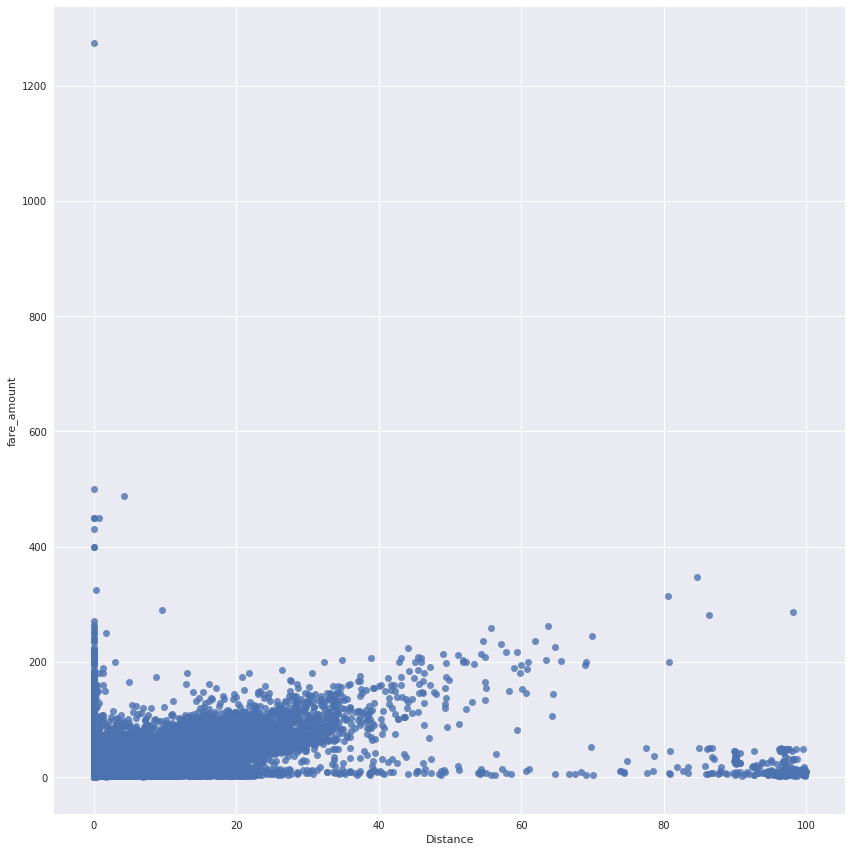

In [14]:
plt_data= train_data[train_data.Distance<100]
sns.lmplot('Distance', 
           'fare_amount', 
           data=plt_data,
           fit_reg=False, size=12)

In [15]:
train_data['day']=train_data['pickup_datetime'].dt.day
train_data['month']=train_data['pickup_datetime'].dt.month
train_data['year']=train_data['pickup_datetime'].dt.year
train_data['hour']=train_data['pickup_datetime'].dt.hour
train_data['day_of_week']=train_data['pickup_datetime'].dt.dayofweek
display(train_data.head(n=10))

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,day,month,year,hour,day_of_week
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,1.029601,15,6,2009,17,0
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,8.443441,5,1,2010,16,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,1.389132,18,8,2011,0,3
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2.795790,21,4,2012,4,5
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,1.998338,9,3,2010,7,1
5,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45,-74.000964,40.731630,-73.972892,40.758233,1,3.787980,6,1,2011,9,3
6,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00,-73.980002,40.751662,-73.973802,40.764842,1,1.554446,20,11,2012,20,1
7,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00,-73.951300,40.774138,-73.990095,40.751048,1,4.159930,4,1,2012,17,2
8,2012-12-03 13:10:00.000000125,9.0,2012-12-03 13:10:00,-74.006462,40.726713,-73.993078,40.731628,1,1.255507,3,12,2012,13,0
9,2009-09-02 01:11:00.00000083,8.9,2009-09-02 01:11:00,-73.980658,40.733873,-73.991540,40.758138,2,2.847028,2,9,2009,1,2


In [16]:
test_data['day']=test_data['pickup_datetime'].dt.day
test_data['month']=test_data['pickup_datetime'].dt.month
test_data['year']=test_data['pickup_datetime'].dt.year
test_data['hour']=test_data['pickup_datetime'].dt.hour
test_data['day_of_week']=test_data['pickup_datetime'].dt.dayofweek
display(train_data.head(n=10))

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,day,month,year,hour,day_of_week
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,1.029601,15,6,2009,17,0
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,8.443441,5,1,2010,16,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,1.389132,18,8,2011,0,3
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2.795790,21,4,2012,4,5
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,1.998338,9,3,2010,7,1
5,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45,-74.000964,40.731630,-73.972892,40.758233,1,3.787980,6,1,2011,9,3
6,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00,-73.980002,40.751662,-73.973802,40.764842,1,1.554446,20,11,2012,20,1
7,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00,-73.951300,40.774138,-73.990095,40.751048,1,4.159930,4,1,2012,17,2
8,2012-12-03 13:10:00.000000125,9.0,2012-12-03 13:10:00,-74.006462,40.726713,-73.993078,40.731628,1,1.255507,3,12,2012,13,0
9,2009-09-02 01:11:00.00000083,8.9,2009-09-02 01:11:00,-73.980658,40.733873,-73.991540,40.758138,2,2.847028,2,9,2009,1,2


In [17]:
#From above distribution its clear that most of the fare amounts are under 100 and distance travelled by most people is under 40km

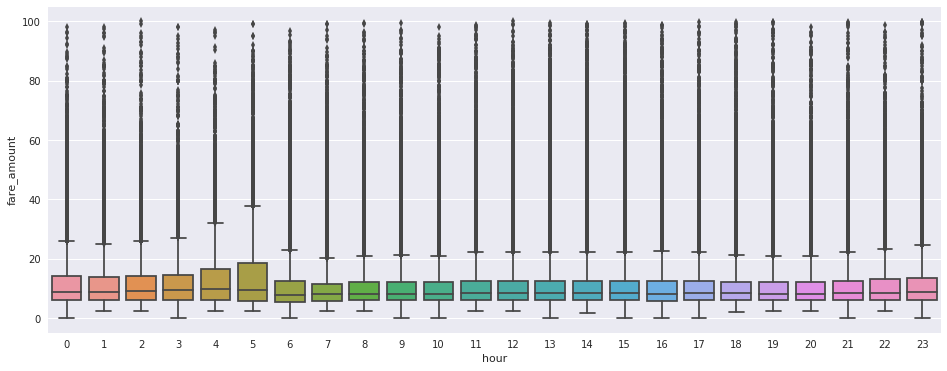

In [18]:
plt_data= train_data[train_data.fare_amount<100]
sns.boxplot('hour', 
           'fare_amount', 
           data=plt_data)

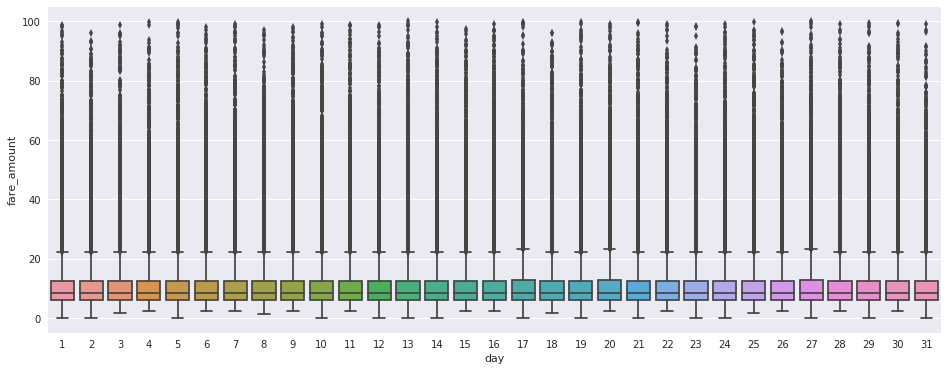

In [19]:
sns.boxplot('day', 
           'fare_amount', 
           data=plt_data)

In [20]:
# fare is higher in early hours of day and towards the end. This could be because there might be lesser taxis at that time

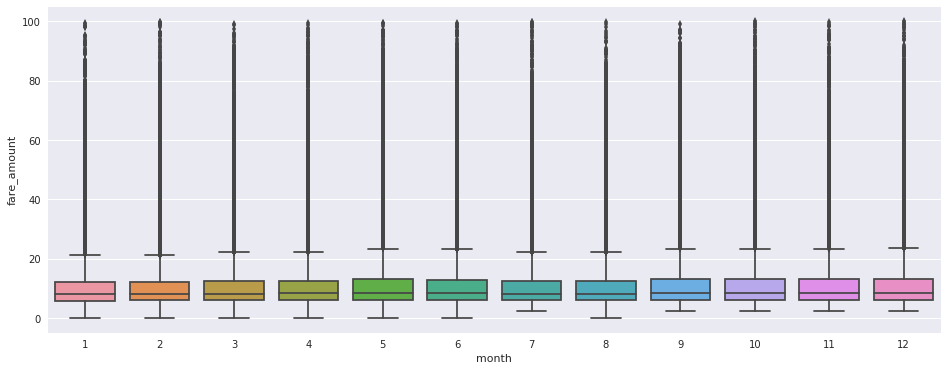

In [21]:
sns.boxplot('month', 
           'fare_amount', 
           data=plt_data)

In [22]:
# fare is uniform in all months

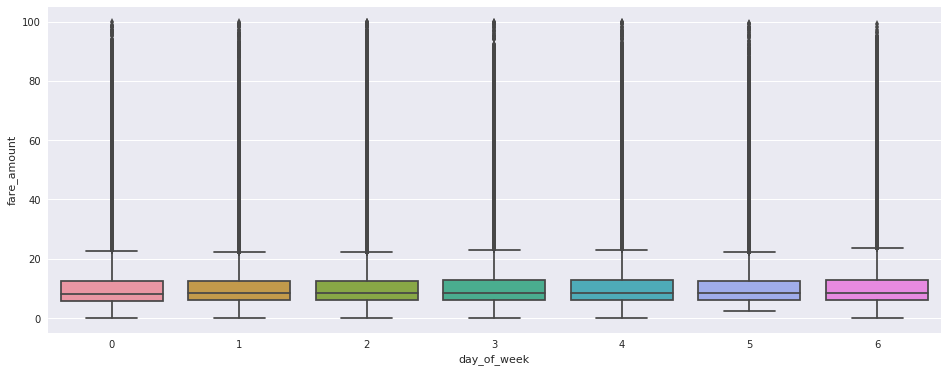

In [23]:
sns.boxplot('day_of_week', 
           'fare_amount', 
           data=plt_data)

In [24]:
#fare is almost same through out the week. 

In [25]:
#In general as distance increases, fare amount increases
train_dist_grt_300_or_lessthan_0 = train_data[train_data.Distance>300]
print(train_dist_grt_300_or_lessthan_0.shape)

(3961, 14)


In [26]:
#it's very unlikely to travel more than 300km ~~186miles in a cab. Most likely it could be error in data entry
#we calculate the distance for those based on fare amount.
#below numbers are based on online search from http://nymag.com/nymetro/urban/features/taxi/n_20286/
#minimum fare amount in nyc = 2.5 
#cost for every 1/5 mile = 40
#cost for 1km = 40*5/1.6 = 125 cents = 1.25$
# fare_amount = 2.5 + (dist * cost for 1km)
#dist = (fare_amount - 2.5)/1.25
#also calculating distance which have fare_amt

def get_new_dist(fare_amount, dist):
    if (dist <= 0 or dist < 300):
        return dist
    else:
        return (fare_amount - 2.5)/1.25

In [27]:
train_data['Distance'] = train_data[['fare_amount','Distance']].apply(lambda x: get_new_dist(x[0],x[1]), axis=1)
train_dist_grt_300_or_lessthan_0 = train_data[train_data.Distance>300]
print(train_dist_grt_300_or_lessthan_0.shape)

(0, 14)


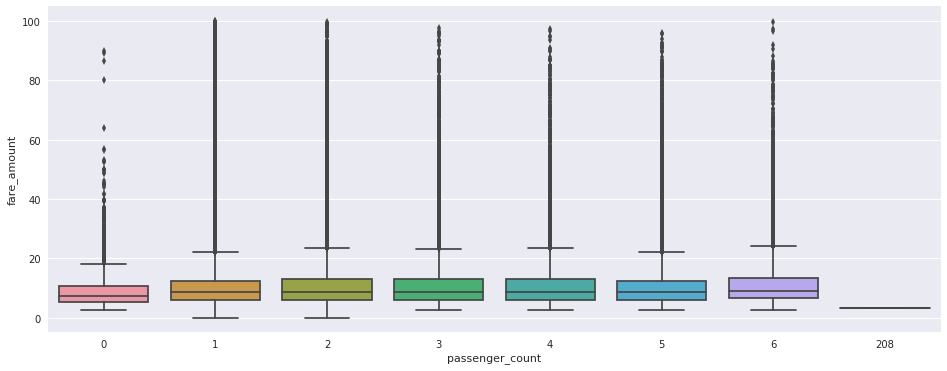

In [28]:
#checking distribution of passenger count with fare_amount
plt_data=train_data[train_data.fare_amount<100]
sns.boxplot('passenger_count', 
           'fare_amount', 
           data=plt_data)

In [29]:
plt_data['passenger_count'].describe()

count    1.998911e+06
mean     1.684282e+00
std      1.315118e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      2.080000e+02
Name: passenger_count, dtype: float64

In [30]:
#from above boxplot fare is almost independent of the number of passengers.
#Dropping rows with passenger count>6
train_data=train_data[train_data.passenger_count<=6]
test_data=test_data[test_data.passenger_count<=6]

print(train_data.shape)
print(test_data.shape)

(1999766, 14)
(9914, 13)


In [31]:
#Drop key and pickup date time 
display(train_data.head(n=10))
display(test_data.head(n=10))


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,day,month,year,hour,day_of_week
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,1.029601,15,6,2009,17,0
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,8.443441,5,1,2010,16,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,1.389132,18,8,2011,0,3
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2.795790,21,4,2012,4,5
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,1.998338,9,3,2010,7,1
5,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45,-74.000964,40.731630,-73.972892,40.758233,1,3.787980,6,1,2011,9,3
6,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00,-73.980002,40.751662,-73.973802,40.764842,1,1.554446,20,11,2012,20,1
7,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00,-73.951300,40.774138,-73.990095,40.751048,1,4.159930,4,1,2012,17,2
8,2012-12-03 13:10:00.000000125,9.0,2012-12-03 13:10:00,-74.006462,40.726713,-73.993078,40.731628,1,1.255507,3,12,2012,13,0
9,2009-09-02 01:11:00.00000083,8.9,2009-09-02 01:11:00,-73.980658,40.733873,-73.991540,40.758138,2,2.847028,2,9,2009,1,2


,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,day,month,year,hour,day_of_week
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2.320991,27,1,2015,13,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2.423802,27,1,2015,13,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,0.618182,8,10,2011,11,5
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,1.959671,1,12,2012,21,5
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,5.382833,1,12,2012,21,5
5,2012-12-01 21:12:12.0000005,2012-12-01 21:12:12,-73.960983,40.765547,-73.979177,40.740053,1,3.221143,1,12,2012,21,5
6,2011-10-06 12:10:20.0000001,2011-10-06 12:10:20,-73.949013,40.773204,-73.959622,40.770893,1,0.931700,6,10,2011,12,3
7,2011-10-06 12:10:20.0000003,2011-10-06 12:10:20,-73.777282,40.646636,-73.985083,40.759368,1,21.566812,6,10,2011,12,3
8,2011-10-06 12:10:20.0000002,2011-10-06 12:10:20,-74.014099,40.709638,-73.995106,40.741365,1,3.871424,6,10,2011,12,3
9,2014-02-18 15:22:20.0000002,2014-02-18 15:22:20,-73.969582,40.765519,-73.980686,40.770725,1,1.101426,18,2,2014,15,1


In [32]:
train_data = train_data.drop(['key','pickup_datetime'], axis = 1)
test_data = test_data.drop(['key','pickup_datetime'], axis = 1)

In [33]:
target_output = train_data['fare_amount']
train_data = train_data.drop('fare_amount', axis=1)

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data, target_output, test_size=0.1, random_state=1)

In [35]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [36]:
from sklearn.metrics import mean_squared_error
rmse_training = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_testing = np.sqrt(mean_squared_error(y_test, y_test_pred))
print('train-rmse: ', rmse_training)
print('test-rmse: ', rmse_testing)

train-rmse:  6.66360426904
test-rmse:  6.74372090518


In [37]:
#predicting the values for test data
y_pred = model.predict(test_data)

In [38]:
#write ouput to file
output = pd.read_csv('./sample_submission.csv')
output['fare_amount'] = y_pred
output.to_csv('linear_reg.csv', index=False)

In [39]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [40]:
from sklearn.metrics import mean_squared_error
rmse_training = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_testing = np.sqrt(mean_squared_error(y_test, y_test_pred))
print('train-rmse: ', rmse_training)
print('test-rmse: ', rmse_testing)

train-rmse:  2.08896967083
test-rmse:  4.636076313


In [41]:
y_pred = model.predict(test_data)

In [42]:
output['fare_amount'] = y_pred
output.to_csv('random_forest.csv', index=False)

In [43]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [44]:
#set parameters for xgboost
params = {'max_depth':8,
          'eta':1,
          'silent':1,
          'objective':'reg:linear',
          'eval_metric':'rmse',
          'learning_rate':0.08
         }
num_rounds = 500

In [45]:
watchlist = [ (dtrain, 'train'), (dtest, 'test')]

In [46]:
model = xgb.train(params, dtrain, num_rounds, watchlist, early_stopping_rounds=30 )

[0]	train-rmse:13.5907	test-rmse:13.7101
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 30 rounds.
[1]	train-rmse:12.6312	test-rmse:12.7543
[2]	train-rmse:11.7572	test-rmse:11.8836
[3]	train-rmse:10.961	test-rmse:11.0924
[4]	train-rmse:10.2371	test-rmse:10.3755
[5]	train-rmse:9.57915	test-rmse:9.72402
[6]	train-rmse:8.98532	test-rmse:9.13673
[7]	train-rmse:8.4476	test-rmse:8.6053
[8]	train-rmse:7.96433	test-rmse:8.12788
[9]	train-rmse:7.52843	test-rmse:7.70108
[10]	train-rmse:7.13815	test-rmse:7.31746
[11]	train-rmse:6.78657	test-rmse:6.97345
[12]	train-rmse:6.47384	test-rmse:6.66968
[13]	train-rmse:6.19463	test-rmse:6.39942
[14]	train-rmse:5.94778	test-rmse:6.16129
[15]	train-rmse:5.72921	test-rmse:5.95
[16]	train-rmse:5.53605	test-rmse:5.76496
[17]	train-rmse:5.36488	test-rmse:5.60215
[18]	train-rmse:5.21487	test-rmse:5.45916
[19]	train-rmse:5.08313	test-rmse:5.33329
[20]	train-rmse:4.9663	test-rmse:

[191]	train-rmse:3.72614	test-rmse:4.33188
[192]	train-rmse:3.72548	test-rmse:4.33165
[193]	train-rmse:3.72481	test-rmse:4.33146
[194]	train-rmse:3.72337	test-rmse:4.33126
[195]	train-rmse:3.72268	test-rmse:4.33123
[196]	train-rmse:3.72187	test-rmse:4.33145
[197]	train-rmse:3.72104	test-rmse:4.33133
[198]	train-rmse:3.71899	test-rmse:4.33097
[199]	train-rmse:3.71848	test-rmse:4.3307
[200]	train-rmse:3.71813	test-rmse:4.33066
[201]	train-rmse:3.71808	test-rmse:4.33064
[202]	train-rmse:3.71701	test-rmse:4.33073
[203]	train-rmse:3.71302	test-rmse:4.33056
[204]	train-rmse:3.71151	test-rmse:4.33038
[205]	train-rmse:3.70944	test-rmse:4.32972
[206]	train-rmse:3.70856	test-rmse:4.3296
[207]	train-rmse:3.7043	test-rmse:4.3281
[208]	train-rmse:3.70396	test-rmse:4.32791
[209]	train-rmse:3.7005	test-rmse:4.32525
[210]	train-rmse:3.69838	test-rmse:4.32435
[211]	train-rmse:3.69468	test-rmse:4.3223
[212]	train-rmse:3.69444	test-rmse:4.32229
[213]	train-rmse:3.69275	test-rmse:4.32198
[214]	train-rmse:

[383]	train-rmse:3.54272	test-rmse:4.28198
[384]	train-rmse:3.54268	test-rmse:4.28206
[385]	train-rmse:3.54216	test-rmse:4.28184
[386]	train-rmse:3.54203	test-rmse:4.28185
[387]	train-rmse:3.54183	test-rmse:4.28184
[388]	train-rmse:3.54025	test-rmse:4.28165
[389]	train-rmse:3.53926	test-rmse:4.2812
[390]	train-rmse:3.5388	test-rmse:4.281
[391]	train-rmse:3.53802	test-rmse:4.28061
[392]	train-rmse:3.53778	test-rmse:4.28054
[393]	train-rmse:3.53776	test-rmse:4.28052
[394]	train-rmse:3.53722	test-rmse:4.28034
[395]	train-rmse:3.53708	test-rmse:4.28036
[396]	train-rmse:3.5361	test-rmse:4.2802
[397]	train-rmse:3.53397	test-rmse:4.27991
[398]	train-rmse:3.5324	test-rmse:4.27966
[399]	train-rmse:3.5318	test-rmse:4.27963
[400]	train-rmse:3.53158	test-rmse:4.27975
[401]	train-rmse:3.5301	test-rmse:4.2789
[402]	train-rmse:3.52916	test-rmse:4.27864
[403]	train-rmse:3.52775	test-rmse:4.27829
[404]	train-rmse:3.52713	test-rmse:4.2783
[405]	train-rmse:3.52599	test-rmse:4.27847
[406]	train-rmse:3.525

In [47]:
print(model.get_fscore())

{'dropoff_longitude': 13770, 'year': 3692, 'hour': 5424, 'pickup_latitude': 11424, 'month': 3326, 'day_of_week': 2358, 'passenger_count': 1268, 'pickup_longitude': 16671, 'day': 4049, 'Distance': 13010, 'dropoff_latitude': 11772}


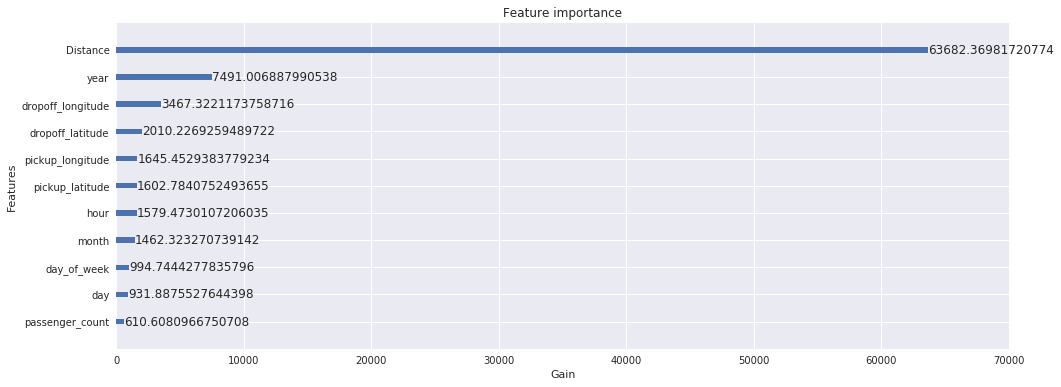

In [48]:
xgb.plot_importance(model, importance_type='gain', xlabel='Gain')

In [49]:
dtest=xgb.DMatrix(test_data)
y_pred = model.predict(dtest)

In [50]:
output['fare_amount'] = y_pred
output.to_csv('xgb.csv', index=False)

In [51]:
#Out of the 3 models, Random forest good testing and training score but seems to be overfitting with training data. xgb has higher training score than random forest
#but testing score is little better. We could use GridSearch to try to improve scores by doing the hyperparameter tuning.